In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [11]:
data1 = pd.read_csv('2018-2010_export.csv')
# print(data1.info())
# print(data1.isnull().sum())
# data1.head(10)

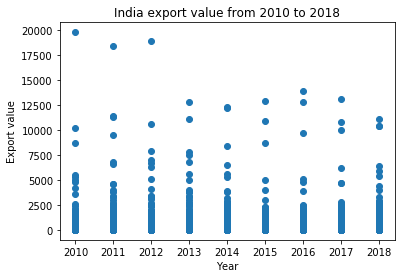

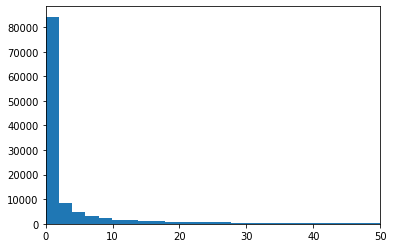

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122985 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       122985 non-null int64
Commodity    122985 non-null object
value        122985 non-null float64
country      122985 non-null object
year         122985 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ MB
None


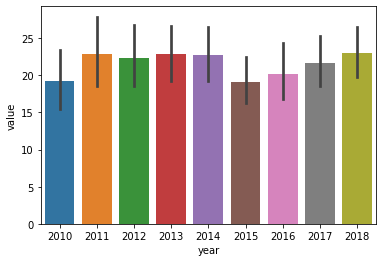

[(-0.2, 5)]

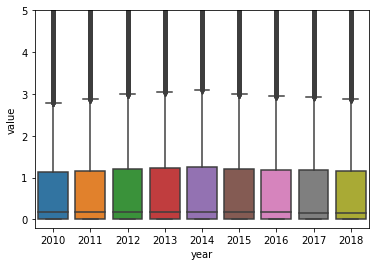

In [13]:
# one variable plot in four different ways
df = data1.dropna()
# scatter plot
plt.scatter(df['year'], df['value'])
plt.xlabel('Year')
plt.ylabel('Export value')
plt.title('India export value from 2010 to 2018')
plt.show()

# histogram
plt.hist(df['value'], bins=10000)
plt.xlim(0,50)
plt.show()
print(df.info())

# bar plot using seaborn
sns.barplot(x=df['year'], y=df['value'])
plt.show()

# box plot
g = sns.boxplot(x=df['year'], y=df[df['value']<10]['value'])
g.set(ylim=(-0.2,5))


In [19]:
data2 = pd.read_csv('Rainier_Weather.csv')
# print(data2.info())
# print(data2.isnull().sum())
# data2.head(10)

data2['Wind level'] = np.where(data2['Wind Speed Daily AVG']>13, 'high', 'low')
data2.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Wind level
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292,high
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833,low
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917,low
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250,low
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708,low


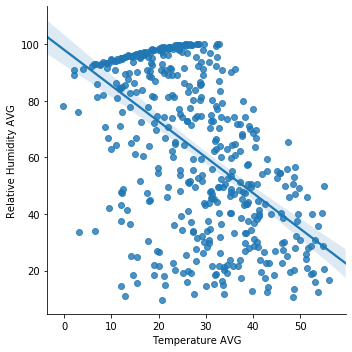

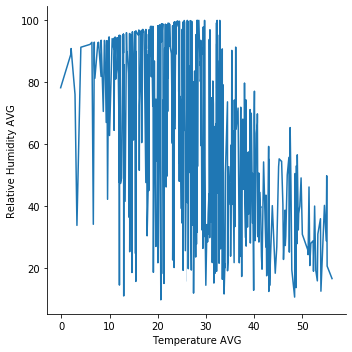

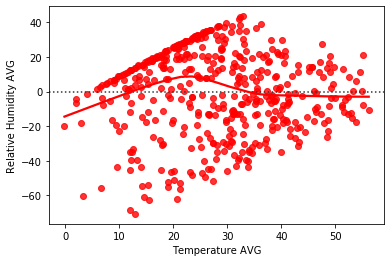

In [17]:
# two continuous variable in three ways
# import seaborn as sns; sns.set(color_codes=True)

g1 = sns.lmplot(x='Temperature AVG', y='Relative Humidity AVG', data=data2)
plt.show()

g2 = sns.relplot(x='Temperature AVG', y='Relative Humidity AVG', data=data2, kind='line')
plt.show()

g3 = sns.residplot(x='Temperature AVG', y='Relative Humidity AVG', data=data2, color='r', lowess=True)

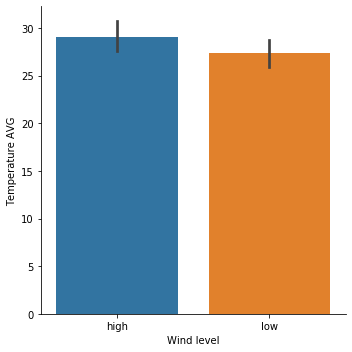

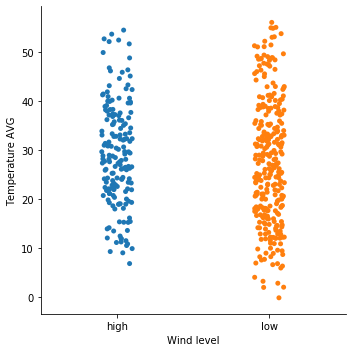

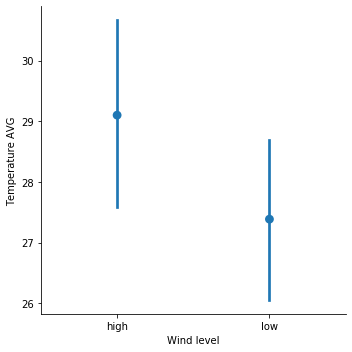

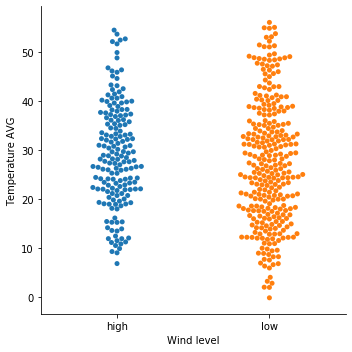

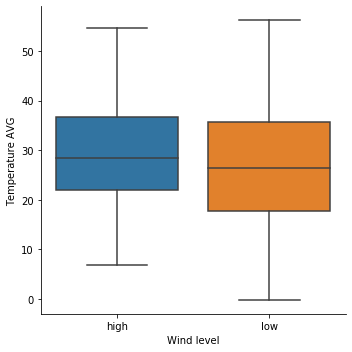

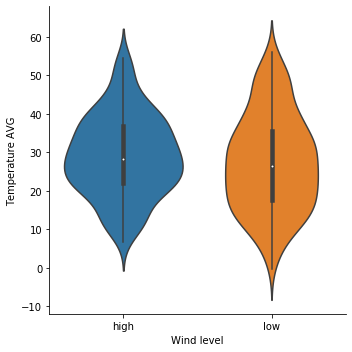

In [18]:
# Choose one continuous variable and one categorical variable, and plot them six different ways.
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='bar')
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='strip')
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='point', join=False)
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='swarm')
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='box')
sns.catplot(x='Wind level',y='Temperature AVG', data=data2, kind='violin')
plt.show()

In [21]:
df = data2[['Temperature AVG','Relative Humidity AVG', 'Wind Speed Daily AVG', 'Solare Radiation AVG', 'Wind level']]
df.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solare Radiation AVG,Wind level
0,19.062917,21.870833,21.977792,84.915292,high
1,14.631208,18.493833,3.540542,86.192833,low
2,6.614292,34.072917,0.000000,85.100917,low
3,8.687042,70.557917,0.000000,86.241250,low
4,14.140417,95.754167,0.000000,31.090708,low


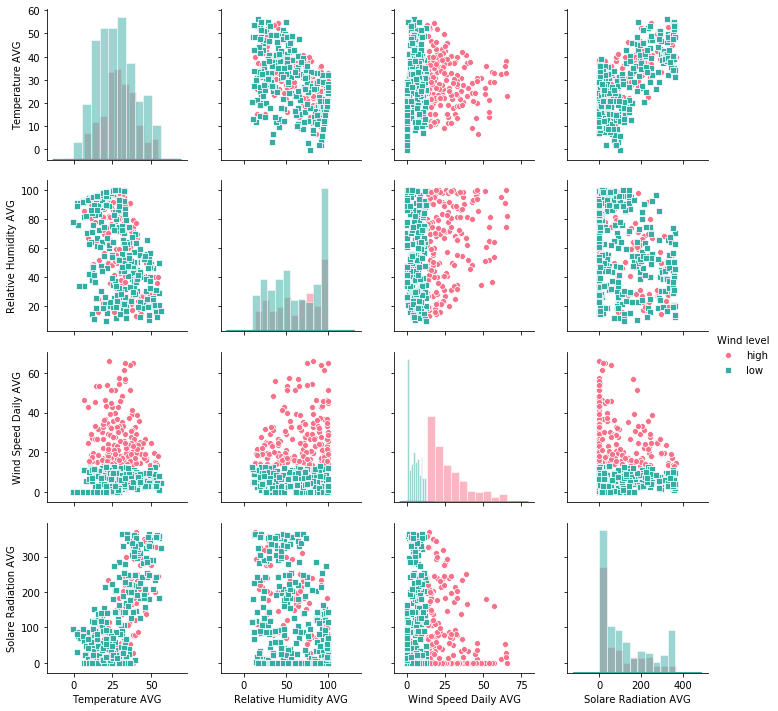

In [40]:
h = sns.pairplot(data=df, hue='Wind level', diag_kind='kde', palette="husl", markers=["o", "s"])
h = h.map_diag(plt.hist, edgecolor='w', alpha=0.5)
